In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
url_wine = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_wine = pd.read_csv(url_wine, sep=';')

print("Primeras filas del dataset:")
print(df_wine.head())

print("\nDistribución de la variable objetivo (calidad):")
print(df_wine['quality'].value_counts())


Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

In [ ]:
#Separar variables y dividir en entrenamiento

X = df_wine.drop('quality', axis=1)
y = df_wine['quality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [3]:
#Relizar el escalamiento de las variables

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [4]:
# poda y profundidad

from sklearn.model_selection import GridSearchCV

parametros = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    parametros,
    cv=5,
    scoring='accuracy'
)
grid.fit(x_train, y_train)

print("Mejores parametros encontrados:")
print(grid.best_params_)


Mejores parametros encontrados:
{'max_depth': 5, 'min_samples_leaf': 8}



Accuracy del mejor modelo: 0.5646

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.61      0.74      0.67       204
           6       0.52      0.58      0.55       192
           7       0.50      0.17      0.25        60
           8       0.00      0.00      0.00         5

    accuracy                           0.56       480
   macro avg       0.27      0.25      0.24       480
weighted avg       0.53      0.56      0.53       480



d:\Program Files (x86)\Python 3.11.5\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Program Files (x86)\Python 3.11.5\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Program Files (x86)\Python 3.11.5\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

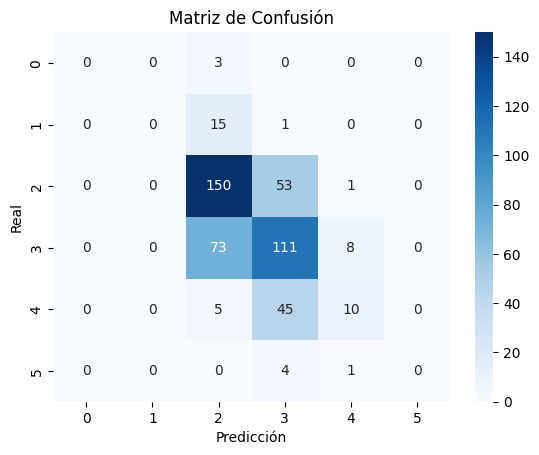

In [ ]:
#Evaluacion del modelo optimo

mejor_modelo = grid.best_estimator_
y_pred = mejor_modelo.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy del mejor modelo: {acc:.4f}\n")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


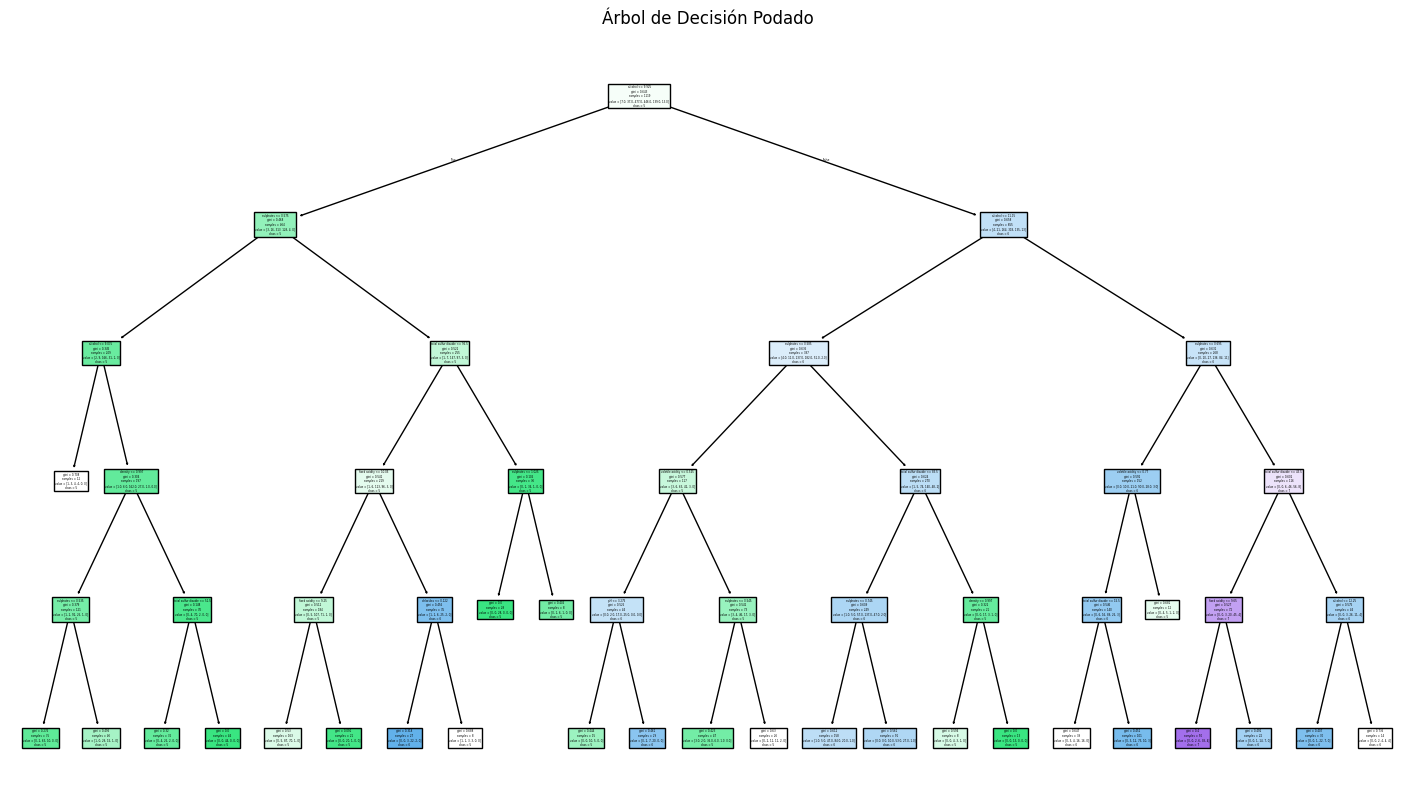

In [6]:
# Visualizacion del arbol

plt.figure(figsize=(18,10))
plot_tree(mejor_modelo, feature_names=X.columns, class_names=[str(c) for c in sorted(y.unique())], filled=True)
plt.title("Árbol de Decisión Podado")
plt.show()
